####  Pandas怎样实现groupby分组统计
类似SQL
select city.max(temperature) from city_weather group by city;

groupby:先对数据分组，然后在每个分组上应用聚合函数、转换函数
    
本次演示：

一、分组使用聚合函数做数据统计  
二、遍历groupby的结果理解执行流程  
三、实例分组探索天气数据  

In [2]:
import pandas as pd
import numpy as np
# 此句可以在jupter notebook展示matplot图表
%matplotlib inline

In [5]:
df=pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
                 'B':['one','one','two','three','two','two','one','three'],
                 'C':np.random.randn(8),
                 'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.498281,-0.042713
1,bar,one,0.242381,1.241265
2,foo,two,-0.017476,-1.020564
3,bar,three,-0.172444,-1.298900
4,foo,two,-0.428290,-0.968012
5,bar,two,0.503011,0.306685
6,foo,one,-0.208193,-0.510943
7,foo,three,-0.795179,0.031798


#### 一、分组使用聚合函数做数据统计

#### 1、单个列groupby，查询所有数据列的统计

In [6]:
df.groupby('A').sum()

,C,D
A,,
bar,0.572948,0.249050
foo,-2.947419,-2.510434


<AxesSubplot:xlabel='A'>

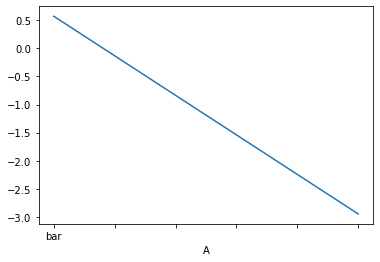

In [27]:
v=df.groupby('A').sum()['C']
v.plot()

我们看到：  
1. groupby中的‘A’变成了数据的索引列
2. 因为要统计sum，但B列不是数字，所以被自动忽略掉

#### 2、多个列groupby，查询所有数据列的统计

In [7]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    0.242381  1.241265
    three -0.172444 -1.298900
    two    0.503011  0.306685
foo one   -0.853237 -0.276828
    three -0.795179  0.031798
    two   -0.222883 -0.994288

In [ ]:
我们看到：['A','B']成对变成二级索引

In [8]:
df.groupby(['A','B'], as_index=False).mean()

,A,B,C,D
0,bar,one,0.242381,1.241265
1,bar,three,-0.172444,-1.298900
2,bar,two,0.503011,0.306685
3,foo,one,-0.853237,-0.276828
4,foo,three,-0.795179,0.031798
5,foo,two,-0.222883,-0.994288


#### 3、同时查看多种数据统计

In [9]:
df.groupby('A').agg([np.sum, np.mean, np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  0.572948  0.190983  0.340649  0.249050  0.083017  1.284769
foo -2.947419 -0.589484  0.584547 -2.510434 -0.502087  0.495490

#### 4、查看单列的结果数据统计

In [10]:
# 方法1：预过滤，性能更好
df.groupby('A')['C'].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,0.572948,0.190983,0.340649
foo,-2.947419,-0.589484,0.584547


In [11]:
# 方法2
df.groupby('A').agg([np.sum, np.mean, np.std])['C']

,sum,mean,std
A,,,
bar,0.572948,0.190983,0.340649
foo,-2.947419,-0.589484,0.584547


In [13]:
#### 5、不同列使用不同的聚合函数
df.groupby('A').agg({'C':np.sum, 'D':np.mean})

,C,D
A,,
bar,0.572948,0.083017
foo,-2.947419,-0.502087


#### 二、遍历groupby的结果理解执行流程
for循环可以直接遍历每个group

#### 1.遍历单个列聚合的分组

In [14]:
g=df.groupby('A')
g

In [15]:
for name, group in g:
    print(name)
    print(group)
    print()

bar
     A      B         C         D
1  bar    one  0.242381  1.241265
3  bar  three -0.172444 -1.298900
5  bar    two  0.503011  0.306685

foo
     A      B         C         D
0  foo    one -1.498281 -0.042713
2  foo    two -0.017476 -1.020564
4  foo    two -0.428290 -0.968012
6  foo    one -0.208193 -0.510943
7  foo  three -0.795179  0.031798



#### 可以获取单个分组的数据

In [17]:
g.get_group('bar')

,A,B,C,D
1,bar,one,0.242381,1.241265
3,bar,three,-0.172444,-1.298900
5,bar,two,0.503011,0.306685


#### 2、遍历多个列聚合的分组

In [19]:
g=df.groupby(['A','B'])
g

In [21]:
g.get_group(('foo', 'one'))

,A,B,C,D
0,foo,one,-1.498281,-0.042713
6,foo,one,-0.208193,-0.510943


In [24]:
type(g)

pandas.core.groupby.generic.DataFrameGroupBy

#### 可以直接查询group后的某几列，生成Series或者子DataFrame

In [22]:
g['C']

In [23]:
for name, group in g['C']:
    print(name)
    print(group)
    print(type(group))
    print()

('bar', 'one')
1    0.242381
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('bar', 'three')
3   -0.172444
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('bar', 'two')
5    0.503011
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('foo', 'one')
0   -1.498281
6   -0.208193
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('foo', 'three')
7   -0.795179
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('foo', 'two')
2   -0.017476
4   -0.428290
Name: C, dtype: float64
<class 'pandas.core.series.Series'>



可以看到，name是一个2个元素的tuple，代表不同的列

In [ ]:
其实所有的聚合统计，都是在dataframe和series上进行的

In [ ]:
# 空气质量实列没有做，to be continued....